# K-Nearest Neighbor Model Implementation


#### PIPELINE FOR HYPERPARAMETER TUNING - FINDING THE BEST K VALUE FOR THE OPTIMAL FEATURE COMBINATION

Here, we implement the KNN Model in the following steps.

1. Initial split of training and testing data on a 75:25 basis with random_state = 2 (this train set will be used for 10-fold cross-validation to find the model which gives the lowest misclassification taking in a considerable number of features. The test set will be used later to check how well the model predicts unseen data.)
2. We have a separate function "_get_all_feature_combinations_" which generates all the feature combinations (i.e. 2^8 - 1 = 8191) in an array.
3. Then we run the _X_train_ and _Y_train_ (normalized using StandardScalar) and all feature combinations through the K-NN model iterator which runs 10-fold cross validation and give us the best K value along with it's misclassification for each iteration (out of 8191 iterations). We get all the results combined as a CSV output [here](../data/knn_iteration_results_8191_04_12_2022_v1.csv).
4. From the results, we manually choose a K value and a feature combination for our final model.
5. Then we train the selected model with the 75% train dataset we split initially and try to run predictions on the unseen 25% test dataset. In this process also we normalize the data using StandardScalar.
6. The final output is given in the following format:

Train Misclassification Error: XX%
Train Accuracy: XX%
Test Misclassification Error: XX%
Test Accuracy: XX%
    
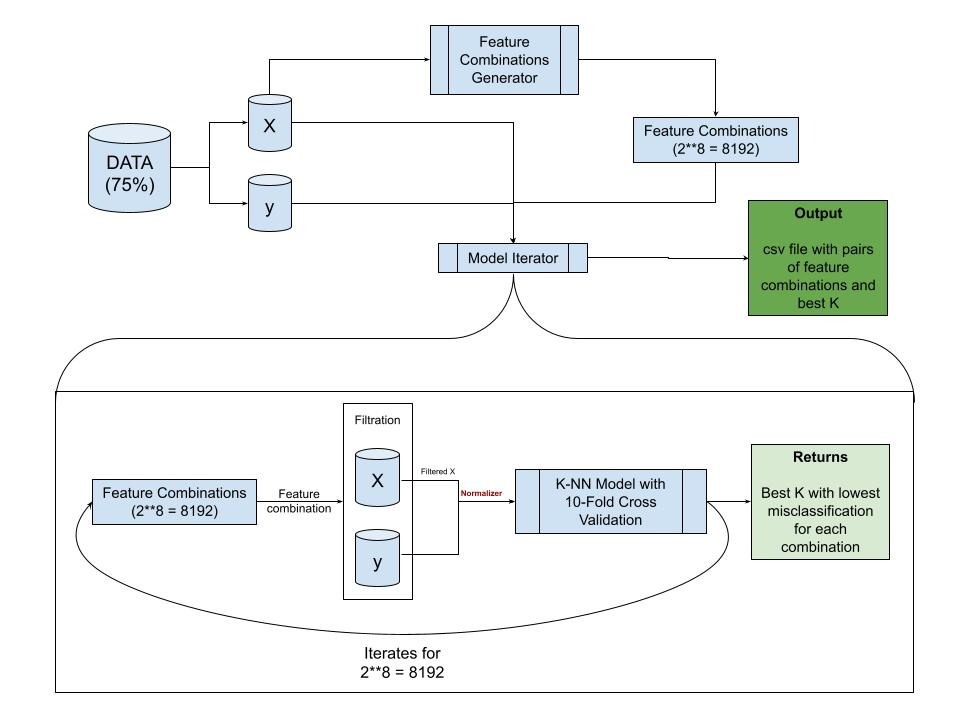

#### IMPORTS


In [1]:
import numpy as np
import pandas as pd
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as prep
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import sys
sys.path.append("..")

from utils.loading_data  import load_to_df_from_csv, get_all_feature_combinations
from utils.knn_functions import find_best_k_with_misclassification_cv, model_iterator_cv, data_normalizer, generate_prediction_results, generate_prediction_results_without_scaling

#### LOADING DATA


In [2]:
# Loading the train.csv as the main dataset
data = load_to_df_from_csv("../data/train.csv")

# Column Transformation to lowercase and underscored spaces
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('-', '_')
data.columns = data.columns.str.lower()

X = data.loc[:, data.columns != 'lead']
y = data.loc[:, data.columns == 'lead']

#### SPLITTING DATA (75% : 25%)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(779, 13), (260, 13), (779, 1), (260, 1)]

#### EXPLORING DATA


In [4]:
data.shape

(1039, 14)

In [5]:
data.describe()


,number_words_female,total_words,number_of_words_lead,difference_in_words_lead_and_co_lead,number_of_male_actors,year,number_of_female_actors,number_words_male,gross,mean_age_male,mean_age_female,age_lead,age_co_lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


#### GET ALL FEATURE COMBINATIONS

In [4]:
feature_combinations = get_all_feature_combinations(X.columns)

#### RUN MODEL ITERATION (10-FOLD CROSS VALIDATION FOR 8191 FEATURE COMBINATIONS)

In [7]:
results = model_iterator_cv(X_train, y_train, feature_combinations, iterations = 10) # 8191 if needed to run for all combinations

4096 OUT OF 8191 ITERATIONS COMPLETED - 50.00610426077402%
4097 OUT OF 8191 ITERATIONS COMPLETED - 50.01831278232206%
4098 OUT OF 8191 ITERATIONS COMPLETED - 50.0305213038701%
4099 OUT OF 8191 ITERATIONS COMPLETED - 50.04272982541814%
4100 OUT OF 8191 ITERATIONS COMPLETED - 50.05493834696618%
4101 OUT OF 8191 ITERATIONS COMPLETED - 50.06714686851422%
4102 OUT OF 8191 ITERATIONS COMPLETED - 50.07935539006226%
4103 OUT OF 8191 ITERATIONS COMPLETED - 50.0915639116103%
4104 OUT OF 8191 ITERATIONS COMPLETED - 50.10377243315835%
4105 OUT OF 8191 ITERATIONS COMPLETED - 50.11598095470639%
4106 OUT OF 8191 ITERATIONS COMPLETED - 50.12818947625443%
4107 OUT OF 8191 ITERATIONS COMPLETED - 50.14039799780247%
4108 OUT OF 8191 ITERATIONS COMPLETED - 50.152606519350506%
4109 OUT OF 8191 ITERATIONS COMPLETED - 50.164815040898546%
4110 OUT OF 8191 ITERATIONS COMPLETED - 50.177023562446585%
4111 OUT OF 8191 ITERATIONS COMPLETED - 50.189232083994625%
4112 OUT OF 8191 ITERATIONS COMPLETED - 50.20144060554


#### GENERATE PREDICTION RESULTS

From the results taken from the iterations, we choose K = 10 with the following feature combinations (10 out of 13 features)

In [12]:
selected_features = [
        'number_words_female',
        'number_of_words_lead',
        'difference_in_words_lead_and_co_lead',
        'number_of_male_actors',
        'number_of_female_actors',
        'number_words_male',
        'gross',
        'mean_age_female',
        'age_lead',
        'age_co_lead'
    ]

generate_prediction_results(X_train[selected_features], y_train, X_test[selected_features], y_test, 10)

Train Misclassification Error: 31.75428159929866%
Train Accuracy: 68.24571840070134%
Test Misclassification Error: 28.71597633136095%
Test Accuracy: 71.28402366863905%
